# U2T2 - Requirement II

## Files handling

In [8]:
import shutil
import os

# Networks do be processed
FILES = ['Slashdot0811', 'Cit-HepTh', 'email-Eu-core', 'soc-Epinions1', 'Wiki-Vote']

def fpath(file_name, flag):
    """
    Format the relative path to files
    """
    file_name = f"{file_name}-processed" if flag else file_name
    return os.path.join('..','..','data', f'{file_name}.txt')

def remove_header(file_name):    
    """
    Make a copy of the file without its first four lines
    """
    # Make a copy of the file
    shutil.copyfile(fpath(file_name,False), fpath(file_name,True))

    with open(fpath(file_name,True), 'r+') as fp:
        # Read and store all lines into list
        lines = fp.readlines()
        # Move file pointer to the beginning of a file
        fp.seek(0)
        # Truncate the file
        fp.truncate()

        # Lines[4:] from line 4 to last line
        fp.writelines(lines[4:])

# Loop through files for removing its four first lines
for idx, file in enumerate(FILES):
    # Avoids file with index 2 because it doesn't have header
    if idx in [2]:
        # Make a copy just for following the pattern
        shutil.copyfile(fpath(file,False), fpath(file,True))
    else:
        # Remove header of others
        remove_header(file)

## Requirement II

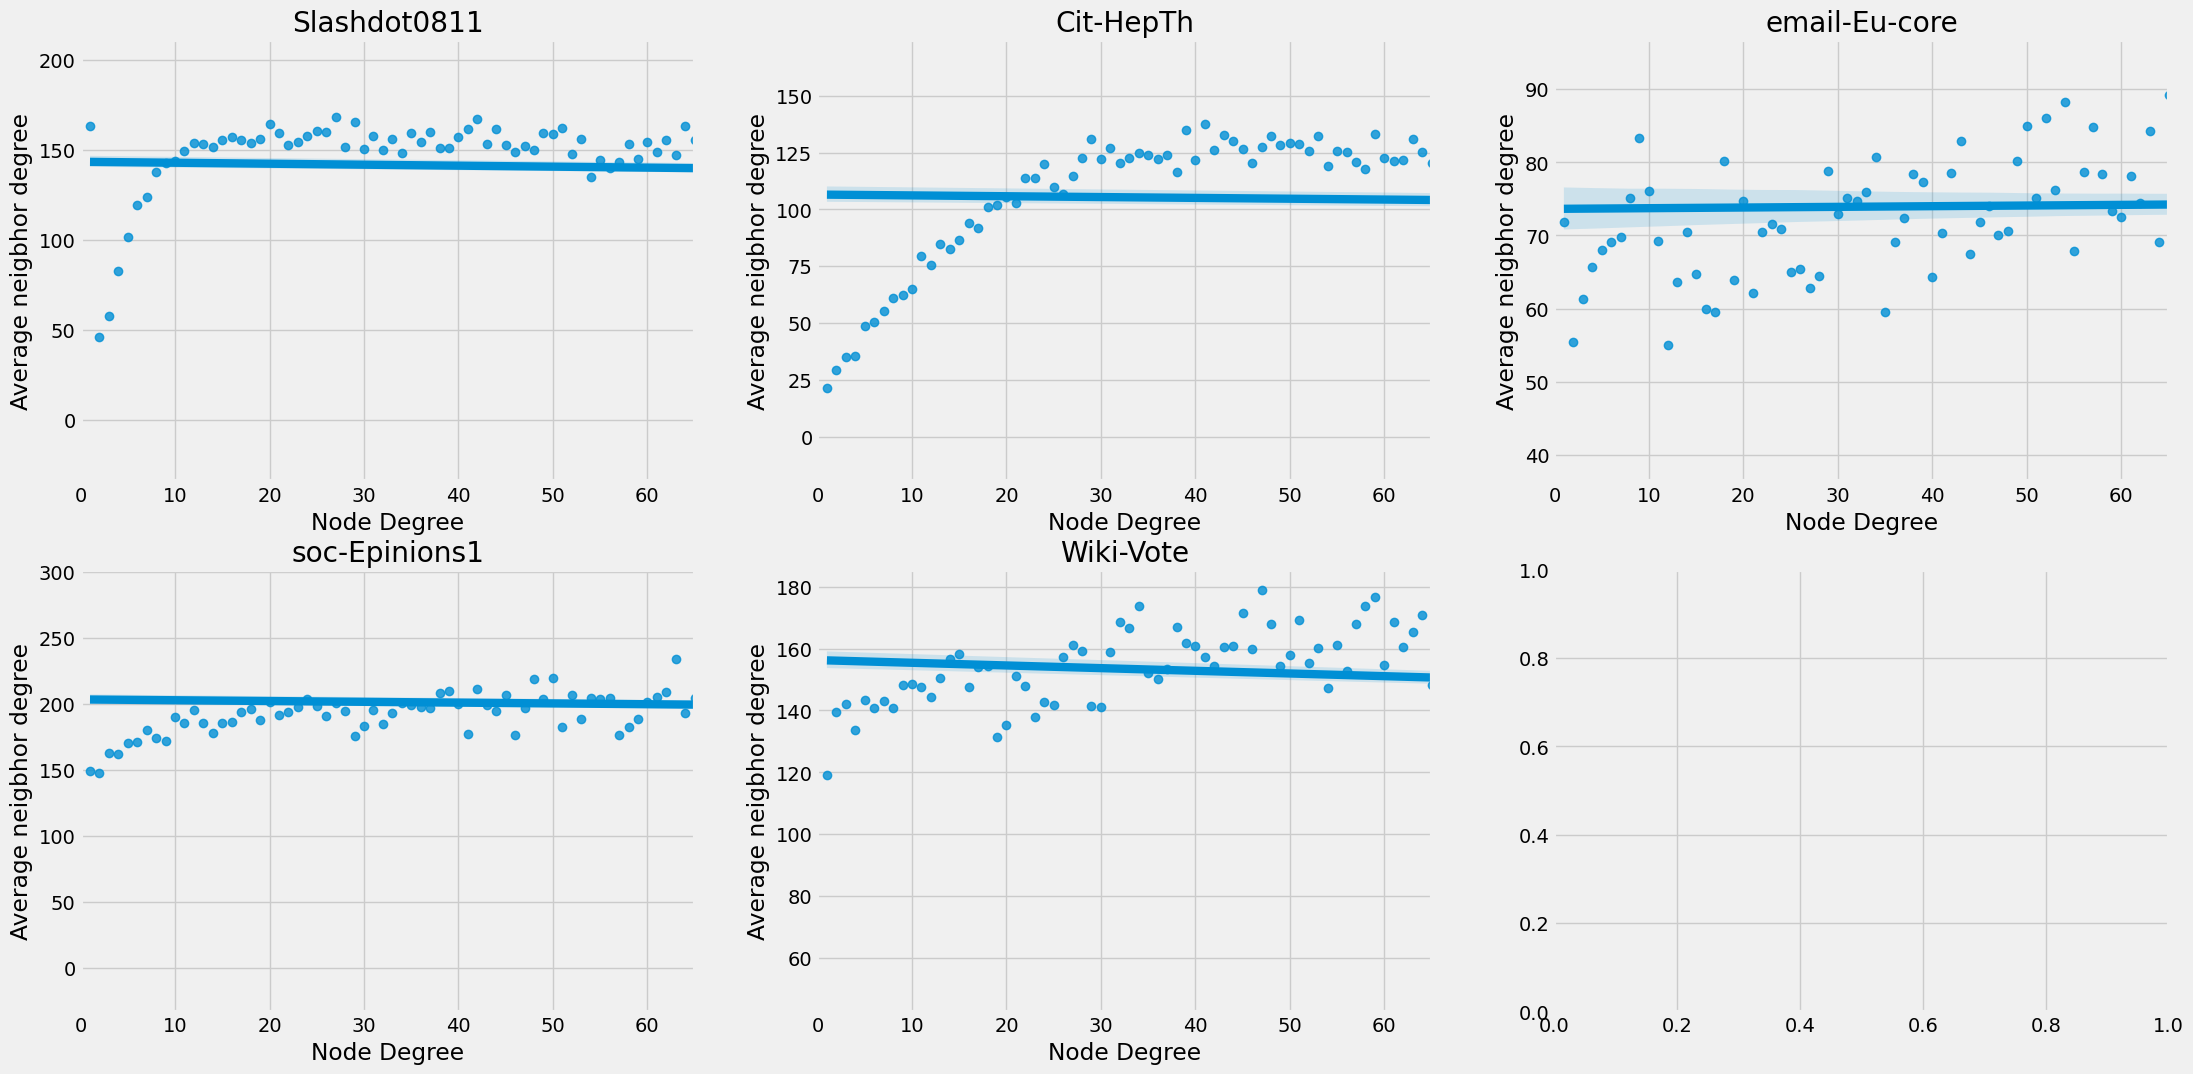

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

class RequirementII:
    def __init__(self, file):
        """
        Class responsible for supporting the analysis of many graphs
        """
        # Read file and its lines
        self.file = file
        fstream = open(fpath(self.file, True), 'r')
        lines = fstream.readlines()

        # Mount graph
        self.G = nx.Graph()

        # Extract nodes
        for idx, line in enumerate(lines):
            s = line.split()        # Remove blank space between values
            s[1] = s[1].strip("\n") # Remove break line
            from_node, to_node = s  # Get edges

            # Casting to integer
            from_node = int(from_node)
            to_node = int(to_node)

            # Add edge
            self.G.add_edge(from_node, to_node)

        # Create directed graph
        self.H = nx.DiGraph(self.G)

    def get_bipartite_chart_data(self):
        """
        Provides data to bipartite chart

        Returns:
            degree           (List) : all nodes degree
            avg_neigh_degree (List) : all nodes average neighboor degree
        """
        # Average degree of neighbors
        degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(self.G).items())

        # Returns lists
        return list(degree), list(avg_neigh_degree)

# Build grid for fitting each chart
fig, axs = plt.subplots(2,3, figsize=(24,12))
count = 0

for file in FILES:
    # Instatiate Requirement 2 solution
    r2 = RequirementII(file)

    # Get lists in order to plot the chart
    degree, avg_neigh_degree = r2.get_bipartite_chart_data()

    # Plot bipartite chart
    plt.style.use("fivethirtyeight")
    sns.regplot(x=degree, y=avg_neigh_degree, ax=axs[count//3, count%3])
    axs[count//3, count%3].set_title(file)
    axs[count//3, count%3].set_xlabel("Node Degree")
    axs[count//3, count%3].set_ylabel("Average neigbhor degree")
    axs[count//3, count%3].set_xlim(0,65)

    # Increment count
    count += 1